<a href="https://colab.research.google.com/github/Andrade-Douglas/Data-Science/blob/master/Analise_de_Dados_Prefeitura_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: Folha de Pagamento Prefeitura
##### Fonte: https://www.votorantim.sp.gov.br/portal/transparencia

##### Fonte de Dados: Folha de Pagamento [clique aqui](https://www.votorantim.sp.gov.br/portal/transparencia/121/2019/)

##### Fonte de Dados: Relação de Servidores [clique aqui](http://s2.asp.srv.br/etransparencia.pm.votorantim.sp/servlet/wwpessoalservidor?4RjsYr9qVYuX_DVvfJ5jqa_01JYuFyZUMqEhneWx_YHSxoLnlrC_+vDnHQ2LtVXV) 
 

#### Montando Drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

#### Importando bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Carregando a primeira Base de Dados com informações pessoais dos colaboradores

In [0]:
df = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Datasets/PessoalServidor-5251.xls', 
                   skiprows = 11, 
                   usecols=['Matrícula', 'Tipo de Vínculo', 'Lotação', 'Local de Trabalho']
                   )
df.head(n = 3)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho
0,13646.0,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS
1,10229.0,ESTATUTÁRIO,UBS ITAPEVA,PAÇO
2,13647.0,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO


#### Tamanho da nossa Base de Dados (linhas, colunas)

In [0]:
print('Número de linhas e colunas:', df.shape)

Número de linhas e colunas: (2573, 4)


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 4 columns):
Matrícula            2568 non-null float64
Tipo de Vínculo      2568 non-null object
Lotação              2568 non-null object
Local de Trabalho    2568 non-null object
dtypes: float64(1), object(3)
memory usage: 80.5+ KB


#### Existência de valores nulos dentro da Base de Dados

In [0]:
print('Existe valor nulo dentro das colunas:', df.isnull().values.any())

Existe valor nulo dentro das colunas: True


#### Quantitativo de valores vazios

In [0]:
df.isnull().sum()

Matrícula            5
Tipo de Vínculo      5
Lotação              5
Local de Trabalho    5
dtype: int64

#### Pesquisando as últimas linhas de nossa Base de Dados

In [0]:
df.tail(n = 6)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho
2562,13259.0,ESTATUTÁRIO,CMEI ODAIR JOSE CAU,CMEI ODAIR CAU
2563,81260.0,CARGO EM COMISSÃO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO
2564,10845.0,ESTATUTÁRIO,AMBULANCIA,PAÇO
2565,11070.0,ESTATUTÁRIO,SECRETARIA DE SAUDE,PAÇO
2566,12095.0,ESTATUTÁRIO,EMEF PROF WALTER ROCHA DE CAMARGO,EMEF PROF WALTER ROCHA DE CAMARGO
2567,12379.0,ESTATUTÁRIO,UBS RIO ACIMA,PAÇO


#### Removendo valores faltantes

In [0]:
df.dropna(how = 'all', inplace = True)
df.isnull().sum()

Matrícula            0
Tipo de Vínculo      0
Lotação              0
Local de Trabalho    0
dtype: int64

#### Após as atualizações segue o novo formato de nossa Base de Dados

In [0]:
df.shape

(2568, 4)

#### Valores faltantes removidos

In [0]:
df.tail(n = 6)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho
2562,13259.0,ESTATUTÁRIO,CMEI ODAIR JOSE CAU,CMEI ODAIR CAU
2563,81260.0,CARGO EM COMISSÃO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO
2564,10845.0,ESTATUTÁRIO,AMBULANCIA,PAÇO
2565,11070.0,ESTATUTÁRIO,SECRETARIA DE SAUDE,PAÇO
2566,12095.0,ESTATUTÁRIO,EMEF PROF WALTER ROCHA DE CAMARGO,EMEF PROF WALTER ROCHA DE CAMARGO
2567,12379.0,ESTATUTÁRIO,UBS RIO ACIMA,PAÇO


#### Trabalhando com os tipos dos registros

In [0]:
df.dtypes

Matrícula            float64
Tipo de Vínculo       object
Lotação               object
Local de Trabalho     object
dtype: object

#### Convertendo matrícula do tipo float64 para tipo object

In [0]:
df['Matrícula'] = df['Matrícula'].astype(object)
df.dtypes

Matrícula            object
Tipo de Vínculo      object
Lotação              object
Local de Trabalho    object
dtype: object

#### Padronizando a compreensão dos títulos das colunas. Sem acentuação, nem caixa alta ou espaços

In [0]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('í', 'i').str.replace('ã', 'a').str.replace('/', '_').str.replace('ç', 'c')
df.head()

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS
1,10229,ESTATUTÁRIO,UBS ITAPEVA,PAÇO
2,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO
3,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO
4,11561,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO


#### Carregando a segunda Base de Dados com informações financeiras dos colaboradores

In [0]:
df2 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Datasets/02-Transparencia-Servidor-FEVEREIRO_2019.xlsx', skiprows = 5, 
                    usecols = ['Matrícula', 'Cargo', 'Situação', 'Vecto Mês', 'Líquido'])
df2.head()

,Matrícula,Cargo,Situação,Vecto Mês,Líquido
0,11.0,PREFEITO,ATIVO,17190.74,6920.30
1,12.0,VICE PREFEITO,ATIVO,8197.45,5832.41
2,1661.0,AUXILIAR DE SERVICOS DE CAMPO,ATIVO,2901.93,1426.24
3,1820.0,AUXILIAR DE TOPOGRAFIA E AGRIMENSURA,ATIVO,2918.42,2315.14
4,1848.0,MOTORISTA,ATIVO,5515.01,3380.86


#### Existência de valores nulos dentro da Base de Dados

In [0]:
print('Este DataFrame possui valores vazios: ', df2.isnull().values.any())

Este DataFrame possui valores vazios:  True


#### Quantitativo de valores vazios

In [0]:
df2.isnull().sum()

Matrícula    4
Cargo        4
Situação     4
Vecto Mês    3
Líquido      3
dtype: int64

#### Quantitativo de linhas de nossa Base de Dados

In [0]:
df2.shape

(2514, 5)

#### Pesquisando as últimas linhas de nossa Base de Dados

In [0]:
df2.tail()

,Matrícula,Cargo,Situação,Vecto Mês,Líquido
2509,100013.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1580.66
2510,NaN,NaN,NaN,NaN,NaN
2511,NaN,NaN,NaN,NaN,NaN
2512,NaN,NaN,NaN,NaN,NaN
2513,NaN,NaN,NaN,9239439.97,6383587.78


#### Removendo valores faltantes

In [0]:
df2 = df2.dropna(axis = 0, how = 'any')
df2.tail()

,Matrícula,Cargo,Situação,Vecto Mês,Líquido
2505,100009.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1301.62
2506,100010.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1784.77
2507,100011.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1784.77
2508,100012.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1580.66
2509,100013.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1580.66


#### Padronizando a compreensão dos títulos das colunas. Sem acentuação, nem caixa alta ou espaços

In [0]:
df2.columns = df2.columns.str.lower().str.replace('í', 'i').str.replace('ç', 'c').str.replace('ã', 'a').str.replace(' ', '_').str.replace('ê', 'e').str.replace('ó', 'o')
df2.head()

,matricula,cargo,situacao,vecto_mes,liquido
0,11.0,PREFEITO,ATIVO,17190.74,6920.30
1,12.0,VICE PREFEITO,ATIVO,8197.45,5832.41
2,1661.0,AUXILIAR DE SERVICOS DE CAMPO,ATIVO,2901.93,1426.24
3,1820.0,AUXILIAR DE TOPOGRAFIA E AGRIMENSURA,ATIVO,2918.42,2315.14
4,1848.0,MOTORISTA,ATIVO,5515.01,3380.86


#### Base de Dados atualizada

In [0]:
df2.shape

(2510, 5)

#### Nome das colunas de nossa Base de Dados

#### Entendendo os tipos de dados envolvendo nossos registros

In [0]:
df2.dtypes

matricula    float64
cargo         object
situacao      object
vecto_mes    float64
liquido      float64
dtype: object

#### Como não iremos trabalhar matematicamente com as colunas abaixo, iremos converter para tipo *object*

In [0]:
df2['matricula'] = df2['matricula'].astype(object)
df2.dtypes

matricula     object
cargo         object
situacao      object
vecto_mes    float64
liquido      float64
dtype: object

#### Base de Dados - Informações pessoais

In [0]:
df.head()

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS
1,10229,ESTATUTÁRIO,UBS ITAPEVA,PAÇO
2,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO
3,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO
4,11561,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO


#### Base de Dados - Informações Financeira

In [0]:
df2.head()

,matricula,cargo,situacao,vecto_mes,liquido
0,11,PREFEITO,ATIVO,17190.74,6920.30
1,12,VICE PREFEITO,ATIVO,8197.45,5832.41
2,1661,AUXILIAR DE SERVICOS DE CAMPO,ATIVO,2901.93,1426.24
3,1820,AUXILIAR DE TOPOGRAFIA E AGRIMENSURA,ATIVO,2918.42,2315.14
4,1848,MOTORISTA,ATIVO,5515.01,3380.86


#### Para uma melhor visualização e entendimento tornaremos as duas Base de Dados em apenas uma

In [0]:
df_df2 = df.merge(df2, on = 'matricula')
df_df2.head(n = 3)

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,ELETRICISTA,ATIVO,2250.40,1745.52
1,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,3150.30,2413.45
2,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,5272.67,4172.73


### Pronto! Temos nossa tabela final para análise. Começaremos com um pouco de estatística:

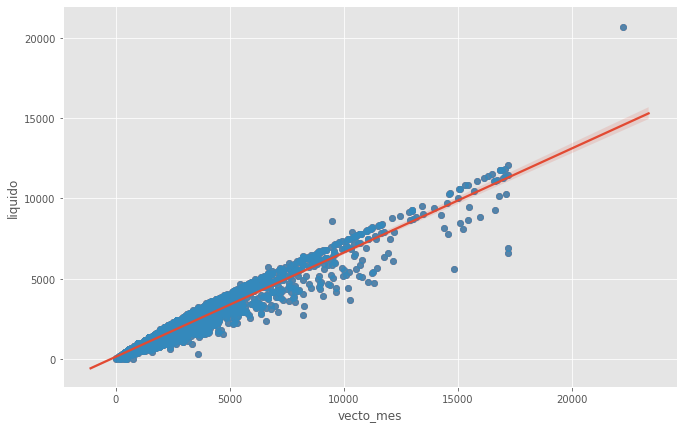

In [0]:
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (11,7)

 
sns.regplot(x=df_df2["vecto_mes"], y=df_df2["liquido"])
#sns.plt.show()
 
# Without regression fit:
sns.regplot(x=df_df2["vecto_mes"], y=df_df2["liquido"], fit_reg=False)
#sns.plt.show()

#### Comando demonstra valores estatísticos:
##### count: Contar o número de observações não nulas.
##### mean: Média dos valores.
##### std: Desvio padrão das observações.
##### min: Mínimo dos valores no objeto.
##### max: Máximo dos valores no objeto.

In [0]:
round(df_df2.groupby('tipo_de_vinculo').liquido.describe().sort_values(by = 'max', ascending = False), 2)

,count,mean,std,min,25%,50%,75%,max
tipo_de_vinculo,,,,,,,,
ESTATUTÁRIO,2017.0,2585.84,1960.05,0.00,1299.97,1969.59,3128.23,20716.24
CARGO EM COMISSÃO,197.0,3521.97,2068.37,263.21,1855.19,3124.67,5011.24,11445.28
AGENTE POLÍTICO,2.0,6376.36,769.25,5832.41,6104.38,6376.36,6648.33,6920.30
TEMPORÁRIO,73.0,1970.35,567.69,652.84,1886.82,1888.82,2405.61,5026.08
ESTAGIÁRIO,194.0,699.74,269.80,32.70,513.40,572.32,981.11,981.11


In [0]:
round(df_df2.groupby('lotacao').liquido.describe().sort_values(by = 'max', ascending = False), 2)

,count,mean,std,min,25%,50%,75%,max
lotacao,,,,,,,,
SERVICO DE PESSOAL,6.0,5518.89,7512.24,1289.85,1925.96,2595.21,3809.28,20716.24
SECRETARIA DE FINANCAS,28.0,2528.05,2617.25,425.15,974.65,1679.76,2517.46,12116.10
UPA CENTRAL,118.0,4737.90,3368.51,11.64,1973.27,3859.63,6872.47,11850.49
AMBULATORIO DE SAUDE DA MULHER E DA CRIANÇA,10.0,5267.55,3231.02,1541.58,3049.55,4629.07,6258.54,11527.98
DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,12.0,5028.34,2548.11,2871.94,3254.77,4163.29,5437.89,11445.28
...,...,...,...,...,...,...,...,...
DEPARTAMENTO DE CULTURA,1.0,981.11,NaN,981.11,981.11,981.11,981.11,981.11
SECAO DE PARQUES E VIVEIROS,1.0,917.97,NaN,917.97,917.97,917.97,917.97,917.97
SECAO DE EXPEDIENTE,1.0,890.98,NaN,890.98,890.98,890.98,890.98,890.98


In [0]:
round(df_df2.groupby('local_de_trabalho').liquido.describe().sort_values(by = 'max', ascending = False), 2)

,count,mean,std,min,25%,50%,75%,max
local_de_trabalho,,,,,,,,
PAÇO,849.0,3322.72,2575.46,0.00,1396.18,2405.78,4764.57,20716.24
CENTRO DE SAUDE RIO ACIMA,6.0,4916.69,4382.82,1174.28,1855.15,2955.36,7546.00,11850.49
EMEIEF PROF PARIZETE J BRESSANE,15.0,2383.26,2264.45,513.40,1145.00,1594.41,2431.19,9419.55
PORTARIA,34.0,2715.64,1734.66,806.10,1533.13,2328.12,3214.69,8964.12
CMEI RAPHAELA RESIO CAU,16.0,2638.83,1999.59,689.31,1838.80,2039.48,2923.63,8844.65
...,...,...,...,...,...,...,...,...
CMEI M AP. FERRATO EXTENÇAO,1.0,1166.59,NaN,1166.59,1166.59,1166.59,1166.59,1166.59
2 DP,1.0,981.11,NaN,981.11,981.11,981.11,981.11,981.11
UBS BARRA FUNDA,1.0,359.74,NaN,359.74,359.74,359.74,359.74,359.74


In [0]:
round(df_df2.groupby('cargo').liquido.describe().sort_values(by = 'max', ascending = False), 2)

,count,mean,std,min,25%,50%,75%,max
cargo,,,,,,,,
ESCRITURARIO,155.0,1968.82,1835.76,0.00,1317.56,1631.48,2063.22,20716.24
AGENTE FAZENDARIO,7.0,5446.54,3114.49,3018.17,3490.57,5201.67,5404.36,12116.10
MEDICO PLANTONISTA,46.0,7904.11,2844.64,1226.21,5747.18,8122.67,10319.01,11850.49
"JULGADOR TRIBUTARIO SECR, FINANCAS",1.0,11445.28,NaN,11445.28,11445.28,11445.28,11445.28,11445.28
MEDICO PEDIATRA,30.0,6551.01,2013.82,1102.24,5134.22,6345.25,7895.29,11398.34
...,...,...,...,...,...,...,...,...
ESTAGIO TECNICO EM SERVICOS JURIDICOS,2.0,588.67,0.00,588.67,588.67,588.67,588.67,588.67
ESTAGIO TECNICO SEGURANCA DO TRABALHO,1.0,588.67,NaN,588.67,588.67,588.67,588.67,588.67
OPERADOR USINA DE ASFALTO A FRIO,1.0,556.75,NaN,556.75,556.75,556.75,556.75,556.75


In [0]:
round(df_df2.groupby('situacao').liquido.describe().sort_values(by = 'max', ascending = False), 2)

,count,mean,std,min,25%,50%,75%,max
situacao,,,,,,,,
ATIVO,2480.0,2499.66,1958.80,0.0,1210.07,1896.14,3083.71,20716.24
DESLIGADO,3.0,879.52,937.42,32.7,375.87,719.04,1302.93,1886.82


In [0]:
round(df_df2.groupby(['tipo_de_vinculo']).agg({'vecto_mes': np.sum, 'tipo_de_vinculo': np.size}),2).sort_values('vecto_mes', ascending = False)

,vecto_mes,tipo_de_vinculo
tipo_de_vinculo,,
ESTATUTÁRIO,7747185.44,2017
CARGO EM COMISSÃO,974963.57,197
TEMPORÁRIO,160852.33,73
ESTAGIÁRIO,138629.93,194
AGENTE POLÍTICO,25388.19,2


In [0]:
round(df_df2.groupby(['lotacao']).agg({'vecto_mes': np.sum, 'tipo_de_vinculo': np.size}),2).sort_values('vecto_mes', ascending = False)

,vecto_mes,tipo_de_vinculo
lotacao,,
UPA CENTRAL,855732.65,118
SECRETARIA DE SERVICOS PUBLICOS,345365.90,124
SECRETARIA DE SAUDE,226115.17,55
SECRETARIA DE EDUCACAO,208844.50,77
SECRETARIA DE NEGOCIOS JURIDICOS,200691.30,55
...,...,...
CMEI AGOSTINHO KRIGUER,1804.27,1
SECAO DE PLANIFICACAO PROJ E C,1761.10,1
SECAO DE EXPEDIENTE,1210.41,1


In [0]:
round(df_df2.groupby(['local_de_trabalho']).agg({'vecto_mes': np.sum, 'tipo_de_vinculo': np.size}),2).sort_values('vecto_mes', ascending = False)

,vecto_mes,tipo_de_vinculo
local_de_trabalho,,
PAÇO,4141477.68,849
SECRETARIA DE SAUDE,426466.18,125
SERVICOS PUBLICOS,255124.89,95
SECRETARIA DE EDUCACAO,214837.69,82
PORTARIA,141399.50,34
...,...,...
PSF PROMORAR,1466.80,1
2 DP,981.11,1
UBS BARRA FUNDA,359.74,1


In [0]:
round(df_df2.groupby(['cargo']).agg({'vecto_mes': np.sum, 'tipo_de_vinculo': np.size}),2).sort_values('vecto_mes', ascending = False)

,vecto_mes,tipo_de_vinculo
cargo,,
PEB I JORNADA BASICA,1058650.63,252
MEDICO PLANTONISTA,572736.26,46
AUXILIAR DE SERVICOS INFANTIS,563618.85,307
PEB I JORNADA UNICA,460056.35,165
ESCRITURARIO,449152.83,155
...,...,...
ESTAGIO ENGENHARIA ELETRICA,981.11,1
ESTAGIARIO DE CIENCIAS BIOLOGICAS,654.07,1
ESTAGIO TECNICO SEGURANCA DO TRABALHO,588.67,1


In [0]:
round(df_df2.groupby(['situacao']).agg({'vecto_mes': np.sum, 'tipo_de_vinculo': np.size}),2).sort_values('vecto_mes', ascending = False)

,vecto_mes,tipo_de_vinculo
situacao,,
ATIVO,9043232.71,2480
DESLIGADO,3786.75,3


In [0]:
round(df_df2.groupby(['situacao', 'tipo_de_vinculo'])[['vecto_mes', 'liquido']].sum().sort_values(by = 'liquido', ascending = False), 2)

vecto_mes     liquido
situacao  tipo_de_vinculo                          
ATIVO     ESTATUTÁRIO        7747185.44  5215634.23
          CARGO EM COMISSÃO   974963.57   693827.89
          TEMPORÁRIO          157098.28   141229.53
          ESTAGIÁRIO          138597.23   135717.79
          AGENTE POLÍTICO      25388.19    12752.71
DESLIGADO TEMPORÁRIO            3754.05     2605.86
          ESTAGIÁRIO              32.70       32.70

In [0]:
df_df2[(df_df2['tipo_de_vinculo'] == 'AGENTE POLÍTICO') & (df_df2['vecto_mes'] >= 17190)]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
814,11,AGENTE POLÍTICO,PREFEITO,PAÇO,PREFEITO,ATIVO,17190.74,6920.3


In [0]:
df_df2[(df_df2['tipo_de_vinculo'] == 'CARGO EM COMISSÃO') & (df_df2['vecto_mes'] >= 17190)]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
1836,11659,CARGO EM COMISSÃO,SAMU,AMBULANCIA,COORDENADOR DE PROGRAMA DE SAUDE SESA,ATIVO,17190.74,6617.87
2445,12349,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,"JULGADOR TRIBUTARIO SECR, FINANCAS",ATIVO,17190.74,11445.28


In [0]:
df_df2[(df_df2['tipo_de_vinculo'] == 'ESTATUTÁRIO') & (df_df2['vecto_mes'] >= 22000)]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
2143,10661,ESTATUTÁRIO,SERVICO DE PESSOAL,PAÇO,ESCRITURARIO,ATIVO,22257.78,20716.24


In [0]:
df_df2[(df_df2['tipo_de_vinculo'] == 'TEMPORÁRIO') & (df_df2['vecto_mes'] >= 4500)]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
1052,75518,TEMPORÁRIO,UPA CENTRAL,SECRETARIA DE SAUDE,ENFERMEIRO PLANTONISTA,ATIVO,6378.5,5026.08


#### Resultado

In [0]:
liquido = round(df_df2['liquido'].sum(),2)
vecto_mes = round(df_df2['vecto_mes'].sum(),2)
desconto = round(df_df2['vecto_mes'].sum() - df_df2['liquido'].sum(), 2)

print('Somatória: ')
print('A coluna líquido: R$ {0:.2f} e a coluna vecto_mes R$ {1:.2f}'.format(liquido, vecto_mes))
print('Diferença entre Vencimento Mês e Liquido: R$ {0:.2f}'.format(desconto))

Somatória: 
A coluna líquido: R$ 6201800.71 e a coluna vecto_mes R$ 9047019.46
Diferença entre Vencimento Mês e Liquido: R$ 2845218.75


#### Criando nova coluna com a diferença dos valores para cada linha registrada

In [0]:
df_df2['desconto'] =  df_df2['vecto_mes'] - df_df2['liquido']

#### Buscando as 10 primeiras colocações

#### Vencimento Mês

In [0]:
vecto_mes = df_df2.sort_values(by = 'vecto_mes', ascending = False)[:10]
vecto_mes

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,desconto
2143,10661,ESTATUTÁRIO,SERVICO DE PESSOAL,PAÇO,ESCRITURARIO,ATIVO,22257.78,20716.24,1541.54
1836,11659,CARGO EM COMISSÃO,SAMU,AMBULANCIA,COORDENADOR DE PROGRAMA DE SAUDE SESA,ATIVO,17190.74,6617.87,10572.87
2445,12349,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,"JULGADOR TRIBUTARIO SECR, FINANCAS",ATIVO,17190.74,11445.28,5745.46
814,11,AGENTE POLÍTICO,PREFEITO,PAÇO,PREFEITO,ATIVO,17190.74,6920.30,10270.44
524,12338,ESTATUTÁRIO,SECRETARIA DE FINANCAS,PAÇO,AGENTE FAZENDARIO,ATIVO,17190.74,12116.10,5074.64
724,12268,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,17101.16,10286.77,6814.39
391,12353,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,17084.27,11376.57,5707.70
1870,13598,ESTATUTÁRIO,UPA CENTRAL,CENTRO DE SAUDE RIO ACIMA,MEDICO PLANTONISTA,ATIVO,17069.93,11850.49,5219.44
824,13984,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16971.83,11304.02,5667.81
1343,11621,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16921.63,11786.04,5135.59


In [0]:
print('Os vinte maiores recebíveis liquido. Total: {0} registros, R$ {1} vencimento mês.'.format(len(vecto_mes), vecto_mes['vecto_mes'].sum()))

Os vinte maiores recebíveis liquido. Total: 10 registros, R$ 176169.56 vencimento mês.


#### Liquido

In [0]:
liquido = df_df2.sort_values(by = 'liquido', ascending = False)[:10]
liquido

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,desconto
2143,10661,ESTATUTÁRIO,SERVICO DE PESSOAL,PAÇO,ESCRITURARIO,ATIVO,22257.78,20716.24,1541.54
524,12338,ESTATUTÁRIO,SECRETARIA DE FINANCAS,PAÇO,AGENTE FAZENDARIO,ATIVO,17190.74,12116.10,5074.64
1870,13598,ESTATUTÁRIO,UPA CENTRAL,CENTRO DE SAUDE RIO ACIMA,MEDICO PLANTONISTA,ATIVO,17069.93,11850.49,5219.44
817,14158,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16864.75,11801.48,5063.27
1343,11621,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16921.63,11786.04,5135.59
1528,11692,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16875.14,11756.04,5119.10
883,11791,ESTATUTÁRIO,AMBULATORIO DE SAUDE DA MULHER E DA CRIANÇA,PAÇO,MEDICO PLANTONISTA,ATIVO,16521.69,11527.98,4993.71
2445,12349,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,"JULGADOR TRIBUTARIO SECR, FINANCAS",ATIVO,17190.74,11445.28,5745.46
436,11505,ESTATUTÁRIO,SECRETARIA DE SAUDE,PAÇO,MEDICO PEDIATRA,ATIVO,16320.78,11398.34,4922.44
391,12353,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,17084.27,11376.57,5707.70


In [0]:
print('Os vinte maiores recebíveis liquido. Total: {0} registros, R$ {1} liquido.'.format(len(vecto_mes), liquido['liquido'].sum()))

Os vinte maiores recebíveis liquido. Total: 10 registros, R$ 125774.56 liquido.


#### Desconto

In [0]:
desconto = df_df2.sort_values(by = 'desconto', ascending = False)[:10]
desconto

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,desconto
1836,11659,CARGO EM COMISSÃO,SAMU,AMBULANCIA,COORDENADOR DE PROGRAMA DE SAUDE SESA,ATIVO,17190.74,6617.87,10572.87
814,11,AGENTE POLÍTICO,PREFEITO,PAÇO,PREFEITO,ATIVO,17190.74,6920.30,10270.44
1710,12151,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,14826.12,5624.02,9202.10
1540,13592,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16623.37,9273.31,7350.06
1979,12403,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,15225.59,8090.54,7135.05
1754,14148,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,15997.24,8867.87,7129.37
1519,11001,ESTATUTÁRIO,EMEIEF ANTONIO MARCIANO,EMEIEF ANTONIO MARCIANO,DIRETOR DE ESCOLA ED BASICA,ATIVO,14578.03,7756.07,6821.96
724,12268,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,17101.16,10286.77,6814.39
2295,12864,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,15445.05,8663.72,6781.33
399,11551,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16822.44,10152.13,6670.31


In [0]:
print('Os vinte maiores recebíveis liquido. Total: {0} registros, R$ {1} desconto.'.format(len(vecto_mes), round(desconto['desconto'].sum(),2)))

Os vinte maiores recebíveis liquido. Total: 10 registros, R$ 78747.88 desconto.
